       Measure  Output Type  Training RMSE  Testing RMSE  Training R2  \
0     2022_1_6   Other Fuel     567.258445    620.791150     0.942742   
0     2022_1_6  Electricity      81.739291    189.543240     0.996106   
0  2024_1_4_05   Other Fuel    1285.060443   1330.026014     0.664076   
0  2024_1_4_05  Electricity     100.889335    104.242962     0.556502   
0     2024_1_0   Other Fuel    1843.601672   2586.001671     0.989639   
0     2024_1_0  Electricity    1346.668368   1521.048593     0.974738   
0     2022_1_8   Other Fuel    2174.979440   3316.282132     0.987257   
0     2022_1_8  Electricity     740.383409   1735.579230     0.992897   
0     2022_1_2   Other Fuel     899.400773   1602.437805     0.985023   
0     2022_1_2  Electricity     485.156515    704.997962     0.970272   
0  2024_1_2_02   Other Fuel     315.855202    482.048862     0.985683   
0  2024_1_2_02  Electricity     170.680332    234.569587     0.974029   
0  2024_1_3_07   Other Fuel      39.883597     51.2

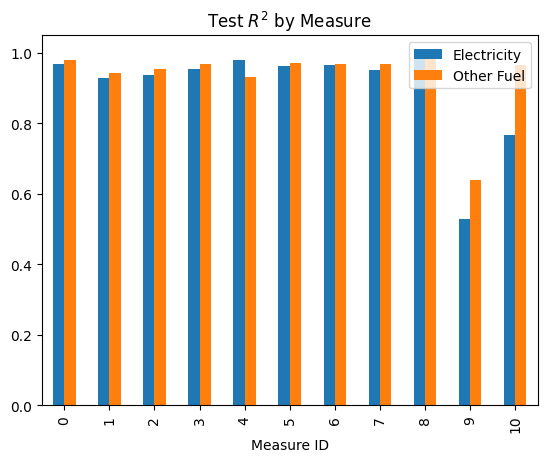

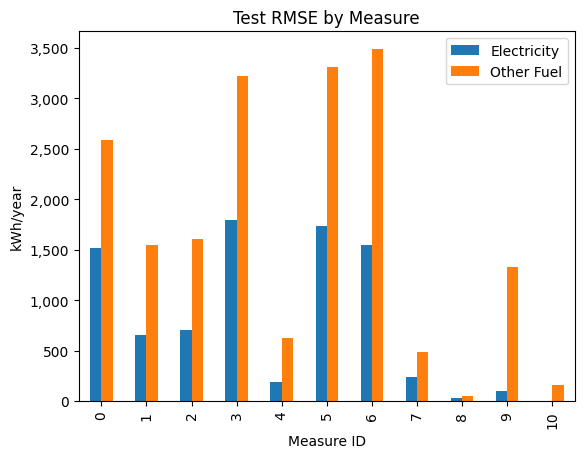

In [92]:
import os 
from pathlib import Path
import pandas as pd
import matplotlib.ticker
import numpy as np
dfs = []
for (root,dirs,files) in os.walk('../Training/Jobs/2024-09-10_train_all'):
    folder_name = os.path.basename(root)
    if folder_name in ["electricity", "other_fuel"]:
        dfs.append(pd.read_csv(root + '/scores.csv'))
    # print("Directory path: %s"%root)
    # print("Directory folder_name: %s"%folder_name)
    # print("Directory Names: %s"%dirs)
    # print("Files Names: %s"%files)
df = pd.concat(dfs).replace({'electricity':'Electricity', 'other_fuel': 'Other Fuel'})
df['Training RMSE'] = np.sqrt(df['Training RMSE'])
df['Testing RMSE'] = np.sqrt(df['Testing RMSE'])
measures_df = pd.read_csv('measures.csv', usecols=['measure_id', 'folder_name']).set_index('folder_name')

df_r2 = df.pivot(index='Measure', columns='Output Type', values='Testing R2')
df_r2 = df_r2.join(measures_df).set_index('measure_id').sort_index()
print(df)

ax_r2 = df_r2.plot.bar(title='Test $R^2$ by Measure', y=['Electricity', 'Other Fuel'], xlabel='Measure ID')

df_rmse = df.pivot(index='Measure', columns='Output Type', values='Testing RMSE')
df_rmse = df_rmse.join(measures_df).set_index('measure_id').sort_index()
print(df)

ax_rmse = df_rmse.plot.bar(title='Test RMSE by Measure', y=['Electricity', 'Other Fuel'], xlabel='Measure ID', ylabel="kWh/year").get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))



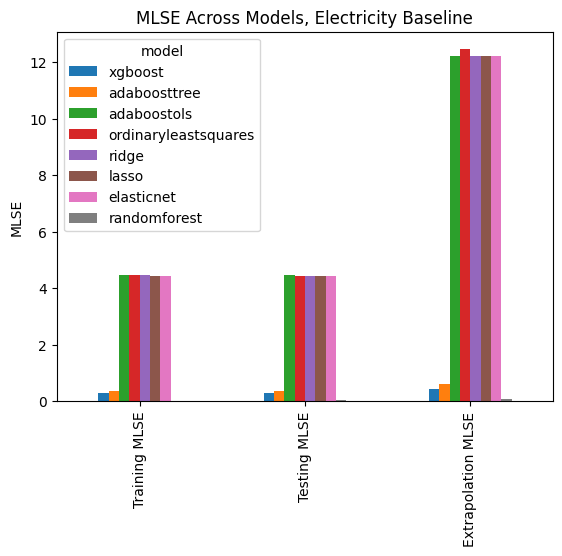

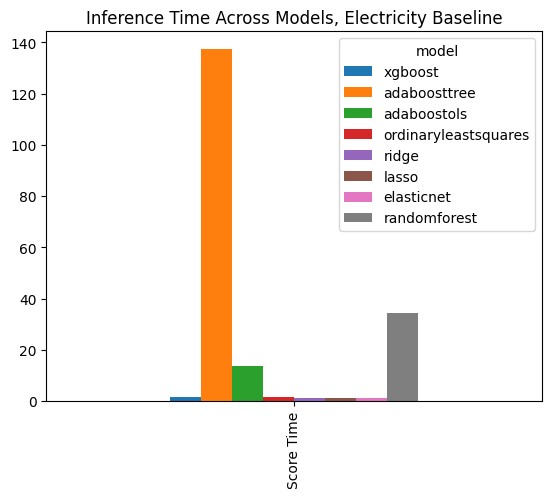

In [93]:
import pandas as pd

df = pd.read_csv('../Training/Jobs/2024-08-10_train/full_results.csv')
df = df.set_index('model')
df = df.rename(columns={'Training RMSE':'Training MLSE','Testing RMSE':'Testing MLSE','Extrapolation RMSE':'Extrapolation MLSE'})
ax1 = df.drop(columns=['Testing R2', 'Training R2', 'Extrapolation R2', 'Score Time']).T.plot.bar(title='MLSE Across Models, Electricity Baseline', ylabel='MLSE')
ax2 = df.drop(columns=['Testing R2', 'Training R2', 'Extrapolation R2', 'Testing MLSE', 'Training MLSE', 'Extrapolation MLSE']).T.plot.bar(title='Inference Time Across Models, Electricity Baseline')
# ax = df.plot.bar()